       count  mean       std  min    25%   50%    75%   max
date                                                       
01-01   50.0  25.5  14.57738  1.0  13.25  25.5  37.75  50.0
01-02   50.0  25.5  14.57738  1.0  13.25  25.5  37.75  50.0
01-03   50.0  25.5  14.57738  1.0  13.25  25.5  37.75  50.0
01-04   50.0  25.5  14.57738  1.0  13.25  25.5  37.75  50.0
01-05   50.0  25.5  14.57738  1.0  13.25  25.5  37.75  50.0
01-06   50.0  25.5  14.57738  1.0  13.25  25.5  37.75  50.0
01-07   50.0  25.5  14.57738  1.0  13.25  25.5  37.75  50.0
01-08   50.0  25.5  14.57738  1.0  13.25  25.5  37.75  50.0
01-09   50.0  25.5  14.57738  1.0  13.25  25.5  37.75  50.0
01-10   50.0  25.5  14.57738  1.0  13.25  25.5  37.75  50.0
     ranking   date               name
0          1  01-01          PMC: 더 벙커
1          2  01-01               아쿠아맨
2          3  01-01                범블비
3          4  01-01                마약왕
4          5  01-01           보헤미안 랩소디
..       ...    ...                ...
495    

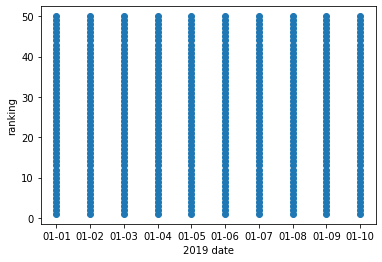

In [32]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

class time :
    s = [0,31,28,31,30,31,30,31,31,30,31,30,31] # 월에 해당하는 날짜

    y,m,d,ch = 0,0,0,0
    def init(self,a,b,c): # 초기화
        self.y = a
        self.m = b
        self.d = c

    def yoonYearCheck(self): # 윤년인지 체크
        if self.y % 4 == 0 :
            if self.y % 100 == 0:
                if self.y % 400 == 0:
                    return 1
                return 0
            return 1
        return 0
    
    def cvrtTime(self): # 시간을 문자열로 변환
        s = ""
        e = ""
        if self.m < 10 : s += "0" + str(self.m)
        else: s += str(self.m )
        if self.d < 10 : e += "0" + str(self.d)
        else : e += str(self.d)

        return str(self.y) + s + e 

    def startCal(self): # 처음 시작 윤년인지 체크해서 2월달 일 수 변경
        t = self.yoonYearCheck()
        self.s[2] += t
        if t == 1 : self.ch = 1
    
    def dayPlus(self):
        self.d += 1 #날짜 하루 증가
        if self.s[self.m] < self.d : #해당 월의 날짜수보다 커지면 다음달로 이동
            self.d %= self.s[self.m] # 1일로 변경
            self.m += 1              # 달 하나 증가
            if self.m > 12 :         # 월이 12보다 크면
                self.y += 1          # 년도 1 증가
                self.m %= 12         # 월 1로 초기화
                t = self.yoonYearCheck() # 윤년 체크
                self.s[2] += t # 윤년이면 더해주고

                if t == 0: # 윤년이 아닌경우인데도
                    if self.ch == 1:  # 전의 해가 윤년이라면
                        self.s[2] -= 1# 2월달 일수 -1
                        self.ch = 0 
                else : self.ch = 1 # 윤년으로 체크

    def printCalender(self):
        print(self.y ,"년 ",self.m,"월 ",self.d,"일")

    def printDay(self):
        for i in self.s:
            print(i , end = ' ')
            
y,m,d = 2019,1,1
url = 'http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cnt&date='

tm = time()
tm.init(y,m,d)
tm.startCal()
data = {'ranking' : [] ,'date' : [],'name' : []}

for i in range(0,10):
    req = requests.get(url + tm.cvrtTime())
    html = req.text
    soup = BeautifulSoup(html,'html.parser')

    rank = 1
    for tag in soup.select('div[class=tit3]'):
        data['ranking'].append(rank)
        a,b='0','0'
        if tm.m < 10 :
            a += str(tm.m)
        else : a = str(tm.m)
        if tm.d < 10 :
            b += str(tm.d)
        else : b = str(tm.d)
        
        data['date'].append(a +'-'+ b)
        data['name'].append(tag.text.strip())
        rank += 1
    tm.dayPlus()
    
s = pd.DataFrame(data)
g = s.groupby('date')['ranking'].describe()
print(g)

scatter = plt.figure()
axe = scatter.add_subplot(1,1,1)
axe.scatter(s['date'],s['ranking'])
axe.set_xlabel('2019 date')
axe.set_ylabel('ranking')

#g.plot()

print(s)

